### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_columns = None
sns.set_style("darkgrid")


### Import Dataset

In [2]:
df = pd.read_csv("Train-Set.csv")
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,Low Fat,0.06,Snack Foods,214.52,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38
8519,FDS36,8.38,Regular,0.05,Baking Goods,108.16,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.28
8520,NCJ29,10.60,Low Fat,0.04,Health and Hygiene,85.12,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN46,7.21,Regular,0.15,Snack Foods,103.13,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.60


# DATA UNDERSTANDING

#### #TOP 3 Rows

In [3]:
df.head(3)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27


#### #Find Shape

In [4]:
df.shape

(8523, 12)

#### #Find Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### #Find Data Types

In [6]:
df.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

In [7]:
df.select_dtypes(include="object").columns

Index(['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize',
       'LocationType', 'OutletType'],
      dtype='object')

In [8]:
df.select_dtypes(include="int").columns

Index(['EstablishmentYear'], dtype='object')

In [9]:
df.select_dtypes(include="float").columns

Index(['Weight', 'ProductVisibility', 'MRP', 'OutletSales'], dtype='object')

#### #Statistical Summary

In [10]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [11]:
df.describe(include="object")


,ProductID,FatContent,ProductType,OutletID,OutletSize,LocationType,OutletType
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


#### #Unique Value In Columns

In [12]:
def unique_columns(bdf):
    cat_var = bdf.select_dtypes(include="object").nunique().sort_values(ascending=False).index
    new_df = pd.DataFrame()
    for i in cat_var:
        new_df[i]= pd.Series(bdf[i].unique())
        new_df.replace(np.NaN,"",inplace=True)
    return new_df.T

unique_columns(df)

0                  1              2     \
ProductID                 FDA15              DRC01          FDN15   
ProductType               Dairy        Soft Drinks           Meat   
OutletID                 OUT049             OUT018         OUT010   
FatContent              Low Fat            Regular        low fat   
OutletType    Supermarket Type1  Supermarket Type2  Grocery Store   
OutletSize               Medium                              High   
LocationType             Tier 1             Tier 3         Tier 2   

                               3          4             5            6     \
ProductID                     FDX07      NCD19         FDP36        FDO10   
ProductType   Fruits and Vegetables  Household  Baking Goods  Snack Foods   
OutletID                     OUT013     OUT027        OUT045       OUT017   
FatContent                       LF        reg                              
OutletType        Supermarket Type3                                         
OutletSize                    Small                                         
LocationType                                                                

                      7          8                   9            10    \
ProductID            FDP10      FDH17               FDU28        FDY07   
ProductType   Frozen Foods  Breakfast  Health and Hygiene  Hard Drinks   
OutletID            OUT046     OUT035              OUT019                
FatContent                                                               
OutletType                                                               
OutletSize                                                               
LocationType                                                             

                11      12             13      14       15     16     17    \
ProductID      FDA03   FDX32          FDS46   FDF32    FDP49  NCB42  DRI11   
ProductType   Canned  Breads  Starchy Foods  Others  Seafood                 
OutletID                                                                     
FatContent                                                                   
OutletType                                                                   
OutletSize                                                                   
LocationType                                                                 

               18     19     20     21     22     23     24     25     26    \
ProductID     FDU02  FDN22  FDW12  NCB30  FDC37  FDR28  NCD06  FDV10  DRJ59   
ProductType                                                                   
OutletID                                                                      
FatContent                                                                    
OutletType                                                                    
OutletSize                                                                    
LocationType                                                                  

               27     28     29     30     31     32     33     34     35    \
ProductID     FDE51  FDC14  FDV38  NCS17  FDP33  FDO23  DRH01  NCX29  FDV20   
ProductType                                                                   
OutletID                                                                      
FatContent                                                                    
OutletType                                                                    
OutletSize                                                                    
LocationType                                                                  

               36     37     38     39     40     41     42     43     44    \
ProductID     DRZ11  FDX10  FDB34  FDK43  FDA46  FDC02  FDL50  FDM39  NCP05   
ProductType                                                                   
OutletID                                                                      
FatContent                                               

#### #Checking Duplicate Values

In [13]:
df.duplicated().sum()

0

#### #Checking Null Values

In [14]:
df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

# DATA PREPROCESSING

#### #Filling Null Values

In [15]:
Total_missing = df.isna().sum()*100/len(df)
Total_missing

ProductID            0.00
Weight              17.17
FatContent           0.00
ProductVisibility    0.00
ProductType          0.00
MRP                  0.00
OutletID             0.00
EstablishmentYear    0.00
OutletSize          28.28
LocationType         0.00
OutletType           0.00
OutletSales          0.00
dtype: float64

In [16]:
df["Weight"].fillna(df["Weight"].mode()[0],inplace=True)
df["OutletSize"].fillna(df["OutletSize"].mode()[0],inplace=True)

df.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

#### #Finding Correlation

<Axes: >

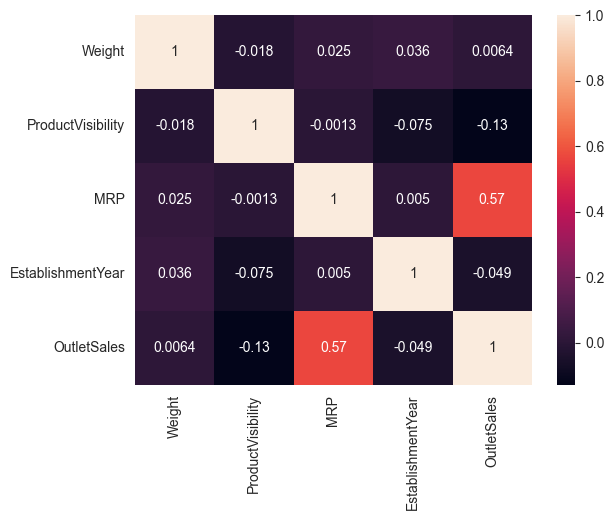

In [17]:
sns.heatmap(data=df.corr(numeric_only=True),fmt=".2g",annot=True)

#### #Distribution Of ProductType By Location Type

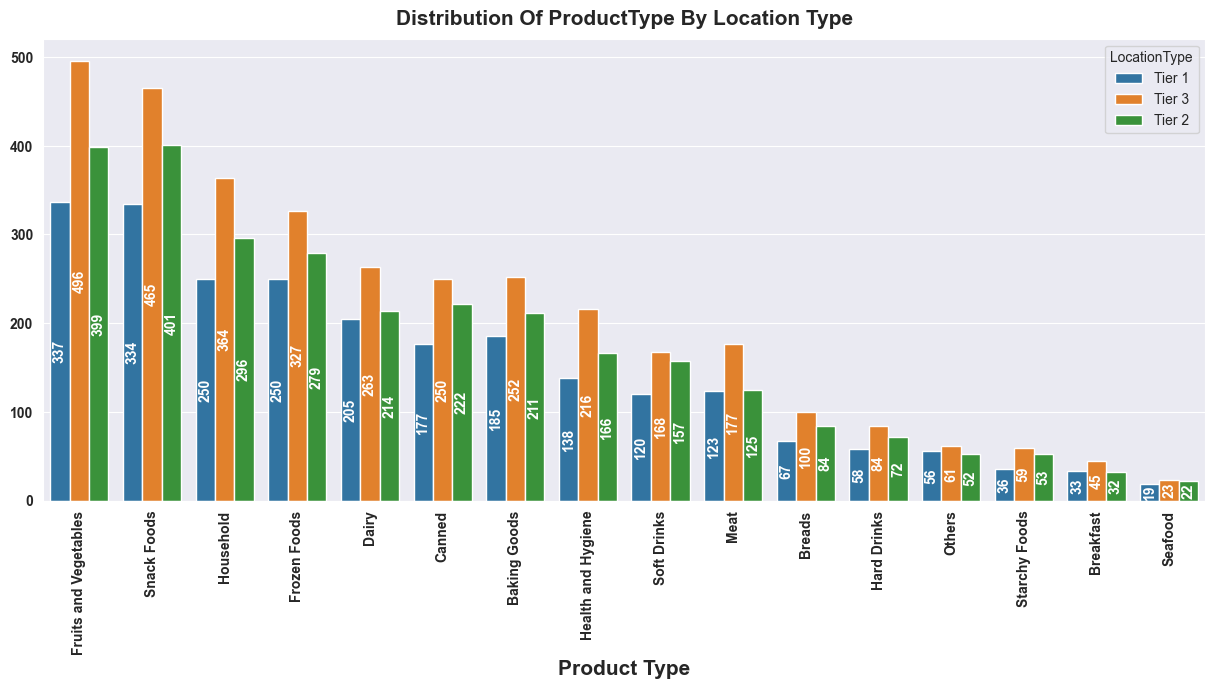

In [18]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df,x=df["ProductType"],order=df["ProductType"].value_counts().index,hue=df["LocationType"])
plt.xticks(rotation=90,weight ="bold")
plt.yticks(weight="bold")
plt.title("Distribution Of ProductType By Location Type",weight = "bold",pad=10,fontsize = 15)
plt.xlabel("Product Type",fontweight="bold",fontsize = 15)
plt.ylabel("")
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,fontweight="bold",color="white",label_type="center",rotation=90)
plt.show()

#### #Distribution Of OutledID

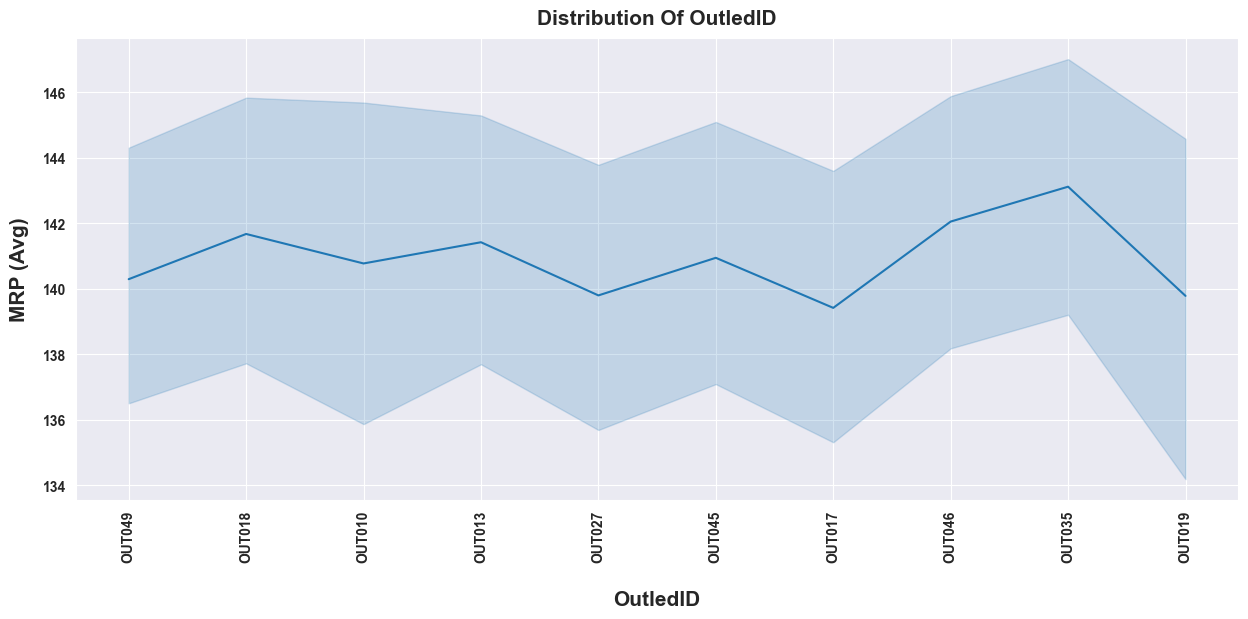

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x=df["OutletID"],y=df["MRP"])
plt.xticks(rotation=90)
plt.title("Distribution Of OutledID",pad=10,fontsize = 15,weight="bold")
plt.ylabel("MRP (Avg)",weight="bold",labelpad= 10,fontsize=15)
plt.xlabel("OutledID",weight="bold",labelpad=20,fontsize=15)
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show()

#### #Distribution Of MRP And OutletSales By MRP_RANGE

In [20]:
bins = np.arange(0,df["MRP"].max()+50,50)
Range = ["0-50","50-100","100-150","150-200","200-250","250-above"]
df["MRP_RANGE"] = pd.cut(df["MRP"],bins,labels=Range)

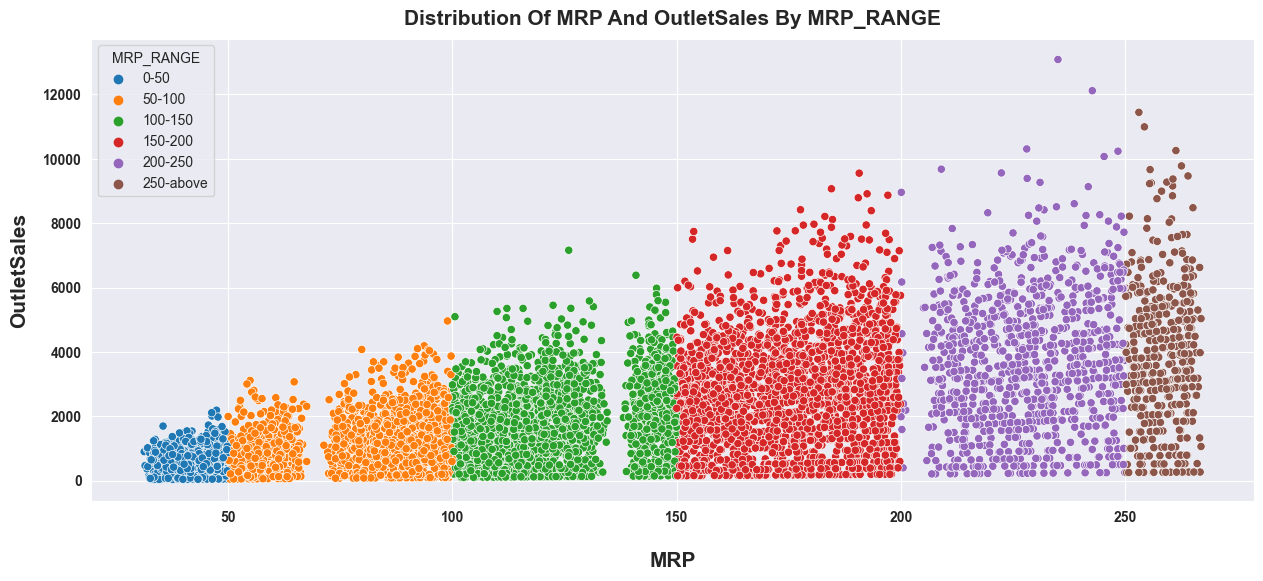

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x=df["MRP"],y=df["OutletSales"],hue=df["MRP_RANGE"])
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.title("Distribution Of MRP And OutletSales By MRP_RANGE",pad=10,fontsize = 15,weight="bold")
plt.ylabel("OutletSales",weight="bold",labelpad= 10,fontsize=15)
plt.xlabel("MRP",weight="bold",labelpad=20,fontsize=15)


plt.show()

#### #Distribution Of EstablishmentYear And OutletSales By OutletSize

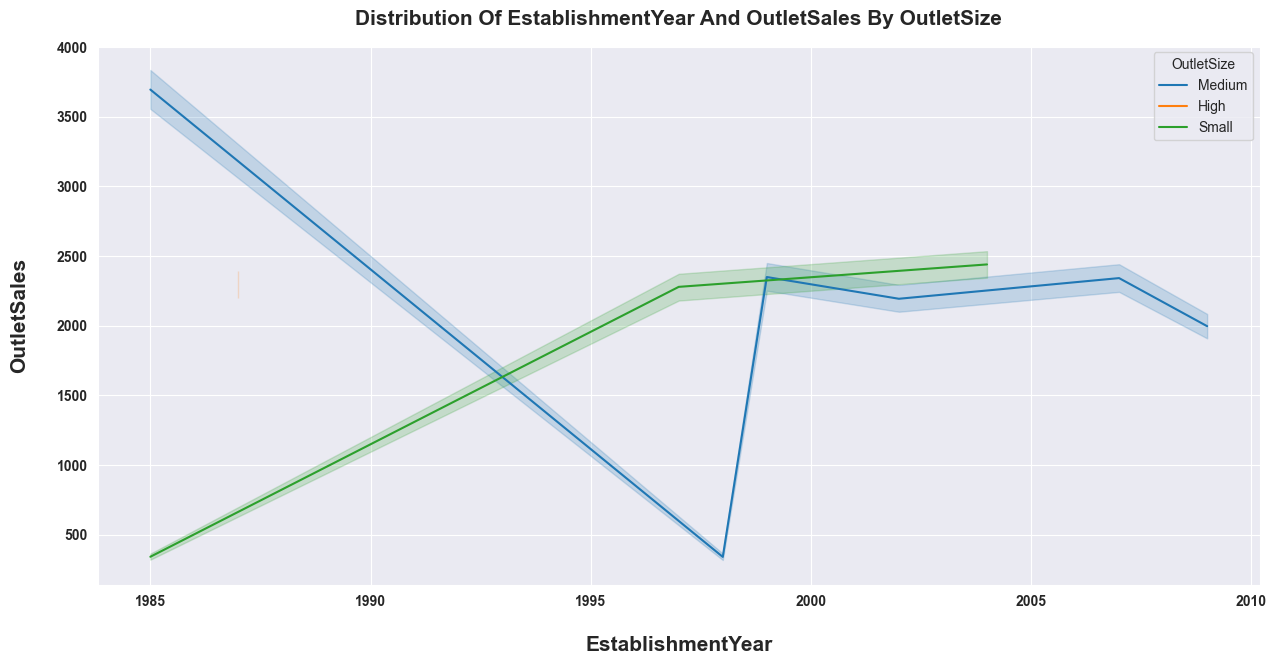

In [22]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df,x=df["EstablishmentYear"],y=df["OutletSales"],hue=df["OutletSize"])
plt.xticks(weight="bold")
plt.title("Distribution Of EstablishmentYear And OutletSales By OutletSize",pad=15,fontsize=15,weight="bold")
plt.yticks(weight="bold")
plt.xlabel("EstablishmentYear",labelpad=20,fontsize = 15,weight="bold")
plt.ylabel("OutletSales",labelpad=20,fontsize = 15,weight="bold")
plt.show()